<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/master/Batch%20Normalization%20%26%20Regularization/NormalizationAndRegularizationOnMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalization and Regularization on MNIST 

#### In the notebook, on MNIST digits classification example, we will try the effects of performing

*   Image normalization
*   L2 regularization
*   ReLU after BN
*   Early stopping with accuracy


### Importing Libraries

In [1]:
import os
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


# Preparing Dataset 

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()


11493376/11490434 [==============================] - 2s 0us/step


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


(60000, 28, 28)


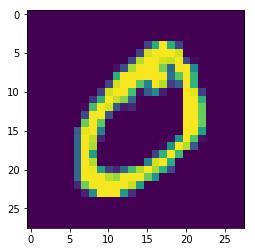

In [4]:
print (trainX.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(trainX[1])

In [0]:
trainX = trainX.reshape(trainX.shape[0], 28, 28,1)
testX = testX.reshape(testX.shape[0], 28, 28,1)

In [0]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

In [0]:
trainY[:10]
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)

In [0]:
# applying transformation to image
train_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen = ImageDataGenerator()

# fit the data augmentation
train_gen.fit(trainX)
test_gen.fit(testX)


In [0]:
training_set= train_gen.flow(trainX, trainY, batch_size=128)
test_set= train_gen.flow(testX, testY, batch_size=128)

In [10]:
trainY[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Creating Model

In [11]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, (3, 3), input_shape=(28,28,1), use_bias=False)) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))

model.add(Convolution2D(16, (3, 3), use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1, activation='relu', use_bias=False)) #22
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, (3, 3), use_bias=False))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(16, (3, 3), use_bias=False))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(16, (3, 3), use_bias=False))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(16, (3, 3), use_bias=False))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(10, 4, 4, use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

W0823 05:30:27.781959 140569952712576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 05:30:27.818434 140569952712576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 05:30:27.826163 140569952712576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 05:30:27.860015 140569952712576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0823 05:30:27.860921 1405699527

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), use_bias=False)`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)               
                         

In [0]:
# checkpoint
outputFolder = '/content/drive/NormalizationAndRegularizationOnMNIST'

filepath=outputFolder+"/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, \
                             save_best_only=True, save_weights_only=True, \
                             mode='auto', period=10)

In [0]:
# define early stopping callback
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
callbacks_list = [earlystop, checkpoint, LearningRateScheduler(scheduler, verbose=1)]
#model.fit(trainX, trainY, batch_size=128, epochs=20, verbose=1, validation_data=(testX, testY), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
model.fit_generator(training_set, steps_per_epoch=60000//128,  validation_data= test_set, validation_steps=10000//128, epochs=5, callbacks=callbacks_list)
                        
          

W0823 05:44:52.490998 140569952712576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0823 05:44:52.596530 140569952712576 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 11s 25ms/step - loss: 0.5399 - acc: 0.8492 - val_loss: 0.1285 - val_acc: 0.9752
Epoch 2/5

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
468/468 [==============================] - 7s 15ms/step - loss: 0.2548 - acc: 0.9228 - val_loss: 0.1079 - val_acc: 0.9723
Epoch 3/5

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
468/468 [==============================] - 7s 15ms/step - loss: 0.2013 - acc: 0.9409 - val_loss: 0.0461 - val_acc: 0.9894
Epoch 4/5

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
468/468 [==============================] - 7s 15ms/step - loss: 0.1767 - acc: 0.9443 - val_loss: 0.0436 - val_acc: 0.9895
Epoch 5/5

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
468/468 [==============================] - 7s 15ms/step - loss: 0.1558 - acc: 0.9488 - val_lo

In [18]:

score = model.evaluate(testX, testY, verbose=0)
print(score)

[0.8432018288612366, 0.7141]
